In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
healthy_cell = sc.read_h5ad("benson_pbmc_post_healthy_donor.h5ad")

healthy = sc.read_h5ad("benson_pbmc_healthy_donor.h5ad")

In [3]:
healthy.var

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std
AL627309.1,226,False,226,0.002966,99.704687,227.0,0.000000e+00,0.057934
AL627309.3,12,False,12,0.000157,99.984320,12.0,1.243717e-12,0.010191
AL669831.2,4,False,4,0.000052,99.994773,4.0,-4.597209e-13,0.002833
AL669831.5,4014,False,4014,0.057272,94.754930,4383.0,-3.333593e-11,0.263088
FAM87B,35,False,35,0.000457,99.954266,35.0,-4.767494e-12,0.019506
...,...,...,...,...,...,...,...,...
AL354822.1,520,False,520,0.007004,99.320519,536.0,3.585137e-11,0.096442
AC004556.1,6445,False,6445,0.112624,91.578356,8619.0,-4.588772e-11,0.258811
AC233755.2,17,False,17,0.000314,99.977786,24.0,0.000000e+00,1.000000
AC233755.1,36,False,36,0.000627,99.952959,48.0,-1.992978e-12,0.022107


In [4]:
# 把total的healthy donor分別做一個標記

# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
# 如果符合這些條件就取為...............若不符合則補other
donor_map = {'5': 'donor 1', '13': 'donor 2', '14': 'donor 3', '19': 'donor 4'}
healthy.obs['donor'] = healthy.obs.index.to_series().str.extract(r'-(5|13|14|19)$', expand=False).map(donor_map).fillna('other')
healthy.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,donor
AAACCCAAGTGTAGAT-5,1699,1699,5398.0,515.0,9.540570,15,donor 1
AAACCCACACAATGCT-5,2184,2184,7260.0,642.0,8.842975,15,donor 1
AAACCCACATACTGAC-5,1729,1729,4522.0,521.0,11.521450,11,donor 1
AAACCCACATGAGATA-5,1798,1798,5077.0,365.0,7.189285,23,donor 1
AAACCCAGTTTCGTGA-5,1727,1727,4872.0,457.0,9.380131,11,donor 1
...,...,...,...,...,...,...,...
TTTGTTGAGGCTTTCA-19,1900,1900,7632.0,632.0,8.280923,21,donor 4
TTTGTTGCAACAAGAT-19,908,908,1692.0,109.0,6.442080,0,donor 4
TTTGTTGCAATCTGCA-19,1608,1608,4382.0,409.0,9.333637,0,donor 4
TTTGTTGTCCTGTAAG-19,1956,1956,5755.0,687.0,11.937446,0,donor 4


In [5]:
healthy.obs["cell_type_l1"] = healthy_cell.obs["predicted.celltype.l1"]
healthy.obs["cell_type_l2"] = healthy_cell.obs["predicted.celltype.l2"]
healthy.obs["cell_type_l3"] = healthy_cell.obs["predicted.celltype.l3"]

In [6]:
healthy

AnnData object with n_obs × n_vars = 18327 × 23311
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'donor', 'cell_type_l1', 'cell_type_l2', 'cell_type_l3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
healthy.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,donor,cell_type_l1,cell_type_l2,cell_type_l3
AAACCCAAGTGTAGAT-5,1699,1699,5398.0,515.0,9.540570,15,donor 1,CD8 T,CD8 TEM,CD8 TEM_2
AAACCCACACAATGCT-5,2184,2184,7260.0,642.0,8.842975,15,donor 1,CD8 T,CD8 TEM,CD8 TEM_2
AAACCCACATACTGAC-5,1729,1729,4522.0,521.0,11.521450,11,donor 1,NK,NK,NK_1
AAACCCACATGAGATA-5,1798,1798,5077.0,365.0,7.189285,23,donor 1,Mono,CD14 Mono,CD14 Mono
AAACCCAGTTTCGTGA-5,1727,1727,4872.0,457.0,9.380131,11,donor 1,other T,gdT,gdT_2
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGCTTTCA-19,1900,1900,7632.0,632.0,8.280923,21,donor 4,B,B intermediate,B intermediate lambda
TTTGTTGCAACAAGAT-19,908,908,1692.0,109.0,6.442080,0,donor 4,NK,NK,NK_2
TTTGTTGCAATCTGCA-19,1608,1608,4382.0,409.0,9.333637,0,donor 4,NK,NK,NK_1
TTTGTTGTCCTGTAAG-19,1956,1956,5755.0,687.0,11.937446,0,donor 4,NK,NK,NK_1


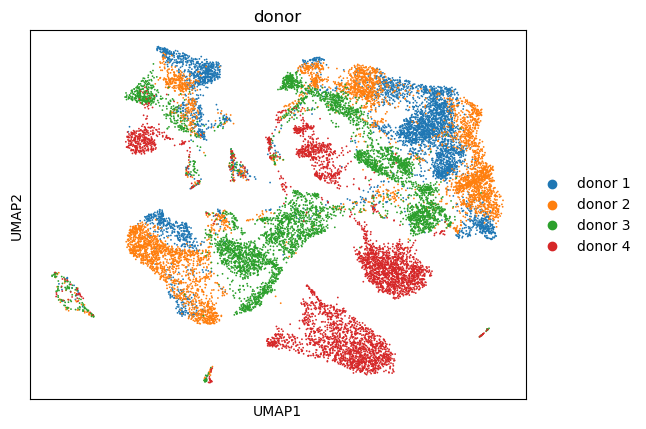

In [8]:
sc.pl.umap(healthy, color = "donor")

In [9]:
#!pip install bbknn
import scanpy as sc
import bbknn

In [10]:
bbknn.bbknn(healthy, batch_key='donor')

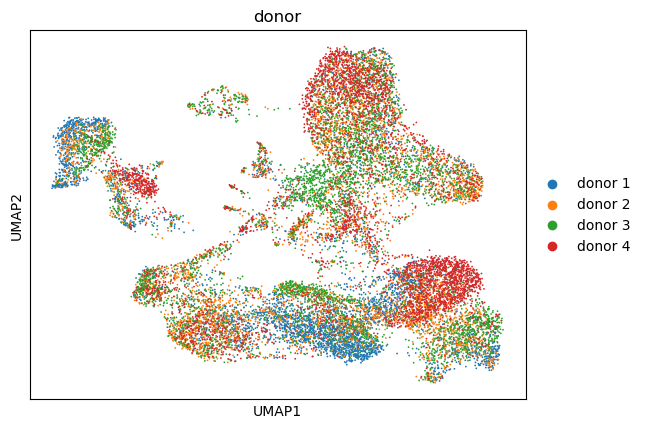

In [13]:
sc.tl.umap(healthy)
sc.pl.umap(healthy, color = "donor")

In [11]:
# 將每個Healthy Donor獨立拉出來看

healthy.obs

# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
pattern_5 = r"-5$"
pattern_13 = r"-13$"
pattern_14 = r"-14$"
pattern_19 = r"-19$"

# 每個healthy donor的結果
healthy_5 = healthy[healthy.obs_names.str.contains(pattern_5)]
healthy_13 = healthy[healthy.obs_names.str.contains(pattern_13)]
healthy_14 = healthy[healthy.obs_names.str.contains(pattern_14)]
healthy_19 = healthy[healthy.obs_names.str.contains(pattern_19)]

# 移除 other
healthy_5 = healthy_5[healthy_5.obs["cell_type_l1"] != "other", :]
healthy_13 = healthy_13[healthy_13.obs["cell_type_l1"] != "other", :]
healthy_14 = healthy_14[healthy_14.obs["cell_type_l1"] != "other", :]
healthy_19 = healthy_19[healthy_19.obs["cell_type_l1"] != "other", :]

healthy_19.obs_names

sc.pl.umap(healthy_5, color = "cell_type_l1")
sc.pl.umap(healthy_13, color = "cell_type_l1")
sc.pl.umap(healthy_14, color = "cell_type_l1")
sc.pl.umap(healthy_19, color = "cell_type_l1")

# All healthy donors
sc.pl.umap(healthy, color = "cell_type_l1")

# Cause have other gene, so filter other gene first
healthy = healthy[healthy.obs["cell_type_l1"] != "other", :]

# All healthy donors without other
sc.pl.umap(healthy, color = "cell_type_l1")

fig, axs = plt.subplots(2, 2, figsize=(18,10))
sc.pl.umap(healthy_5, color = "cell_type_l1",ax=axs[0, 0], show=False)
sc.pl.umap(healthy_13, color = "cell_type_l1",ax=axs[0, 1], show=False)
sc.pl.umap(healthy_14, color = "cell_type_l1",ax=axs[1, 0], show=False)
sc.pl.umap(healthy_19, color = "cell_type_l1",ax=axs[1, 1], show=False)

plt.show()sc.pl.umap(healthy, color = "donor")

SyntaxError: invalid syntax (2128480694.py, line 46)

# 將每個Healthy Donor獨立拉出來看

In [ ]:
healthy.obs

In [ ]:
# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
pattern_5 = r"-5$"
pattern_13 = r"-13$"
pattern_14 = r"-14$"
pattern_19 = r"-19$"

# 每個healthy donor的結果
healthy_5 = healthy[healthy.obs_names.str.contains(pattern_5)]
healthy_13 = healthy[healthy.obs_names.str.contains(pattern_13)]
healthy_14 = healthy[healthy.obs_names.str.contains(pattern_14)]
healthy_19 = healthy[healthy.obs_names.str.contains(pattern_19)]

In [ ]:
# 移除 other
healthy_5 = healthy_5[healthy_5.obs["cell_type_l1"] != "other", :]
healthy_13 = healthy_13[healthy_13.obs["cell_type_l1"] != "other", :]
healthy_14 = healthy_14[healthy_14.obs["cell_type_l1"] != "other", :]
healthy_19 = healthy_19[healthy_19.obs["cell_type_l1"] != "other", :]

In [ ]:
healthy_19.obs_names

In [ ]:
sc.pl.umap(healthy_5, color = "cell_type_l1")
sc.pl.umap(healthy_13, color = "cell_type_l1")
sc.pl.umap(healthy_14, color = "cell_type_l1")
sc.pl.umap(healthy_19, color = "cell_type_l1")

In [ ]:
# All healthy donors
sc.pl.umap(healthy, color = "cell_type_l1")

# Cause have other gene, so filter other gene first
healthy = healthy[healthy.obs["cell_type_l1"] != "other", :]

# All healthy donors without other
sc.pl.umap(healthy, color = "cell_type_l1")

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))
sc.pl.umap(healthy_5, color = "cell_type_l1",ax=axs[0, 0], show=False)
sc.pl.umap(healthy_13, color = "cell_type_l1",ax=axs[0, 1], show=False)
sc.pl.umap(healthy_14, color = "cell_type_l1",ax=axs[1, 0], show=False)
sc.pl.umap(healthy_19, color = "cell_type_l1",ax=axs[1, 1], show=False)

plt.show()